In [125]:
import geopandas as gpd
import geodatasets
from shapely.geometry import Point
import shutil
import numpy as np
import ast
import folium
import seaborn

# Data 

In [ ]:
src = geodatasets.get_path("GeoDa cars")
dst = r"D:\Learning\GIS\data\Abandoned_Vehicles_Map.csv"
shutil.move(src, dst)

'D:\\Learning\\GIS\\data\\Abandoned_Vehicles_Map.csv'

In [13]:
path = r"data\Abandoned_Vehicles_Map.csv"
cars = gpd.read_file(path)

In [14]:
cars["Location"] = cars["Location"].apply(
    lambda coord: Point(ast.literal_eval(coord)[::-1])
    if coord.strip() != '' else np.nan
)
"""
`ast.literal_eval()` is a function from Python’s 
abstract syntax trees (`ast`) module 
that safely evaluates a string containing 
a Python literal or 
container display (like a tuple, list, dict, or string) and 
returns the corresponding Python object. 
It only allows certain expressions (e.g., literals) and doesn't execute arbitrary code,
 making it safer than the built-in `eval()` function.
"""

"\n`ast.literal_eval()` is a function from Python’s \nabstract syntax trees (`ast`) module \nthat safely evaluates a string containing \na Python literal or \ncontainer display (like a tuple, list, dict, or string) and \nreturns the corresponding Python object. \nIt only allows certain expressions (e.g., literals) and doesn't execute arbitrary code,\n making it safer than the built-in `eval()` function.\n"

In [116]:
cars_sample = cars.sample(5000,random_state=0)
cars_sample = cars_sample.set_geometry(cars_sample['Location'])
airbnb = gpd.read_file(geodatasets.get_path("geoda airbnb"))
cars_sample = cars_sample.set_crs(airbnb.crs)

In [118]:
# Perform spatial join: each point gets the index of the polygon it falls in.
joined = gpd.sjoin(cars_sample, airbnb, predicate='within',how='inner')

# Group by the polygon index (typically 'index_right') and count points.
point_counts = joined.groupby('index_right').size()

# Optionally, merge the counts back to your polygons dataframe.
airbnb['ab_cars_count'] = airbnb.index.map(point_counts).fillna(0).astype(int)

In [119]:
m = folium.Map(
    location =[41.893246,-87.6012440222079],
    control_scale=True
)
cars_sample.explore(
    m=m,
    name  = 'Abandoned cars',
    color='red'
)
airbnb.explore(
    m=m,
    name  = 'Airbnb',
    column='ab_cars_count'
)
folium.LayerControl().add_to(m)
m

<Axes: >

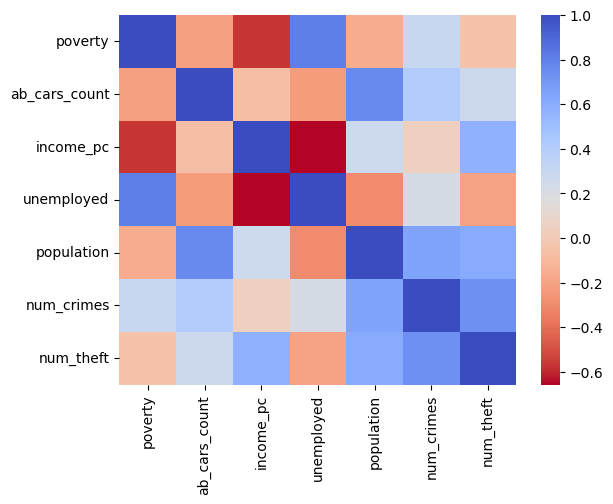

In [130]:
seaborn.heatmap(
    airbnb[['poverty','ab_cars_count','income_pc', 'unemployed','population','num_crimes', 'num_theft', ]].corr(),
    cmap='coolwarm_r'
)